<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/ML_Assessment_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Income   Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  8.3252  41.0  6.984127  1.023810       322.0   2.555556     37.88   
1  8.3014  21.0  6.238137  0.971880      2401.0   2.109842     37.86   
2  7.2574  52.0  8.288136  1.073446       496.0   2.802260     37.85   
3  5.6431  52.0  5.817352  1.073059       558.0   2.547945     37.85   
4  3.8462  52.0  6.281853  1.081081       565.0   2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
Dataset Shape: (20640, 9)

Missing Values After Handling:
 Income        0
Age           0
Rooms         0
Bedrooms      0
Population    0
Occupancy     0
Latitude      0
Longitude     0
Price         0
dtype: int64

Descriptive Statistics:
              Income           Age         Rooms      Bedrooms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486  

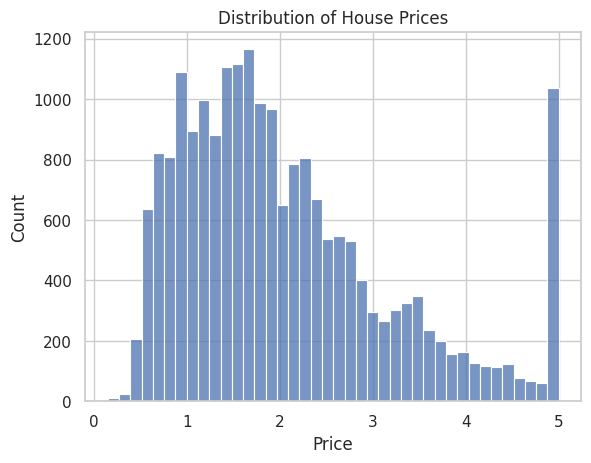

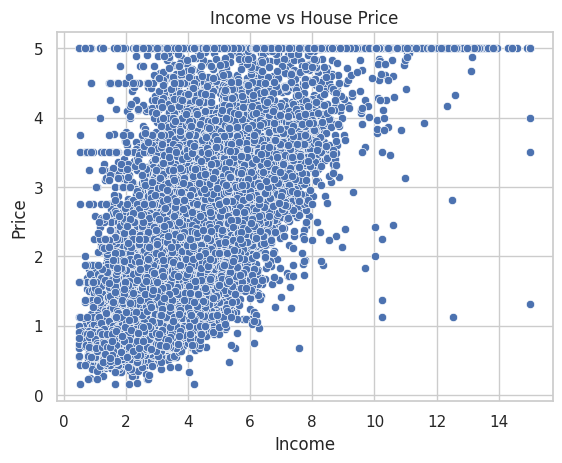

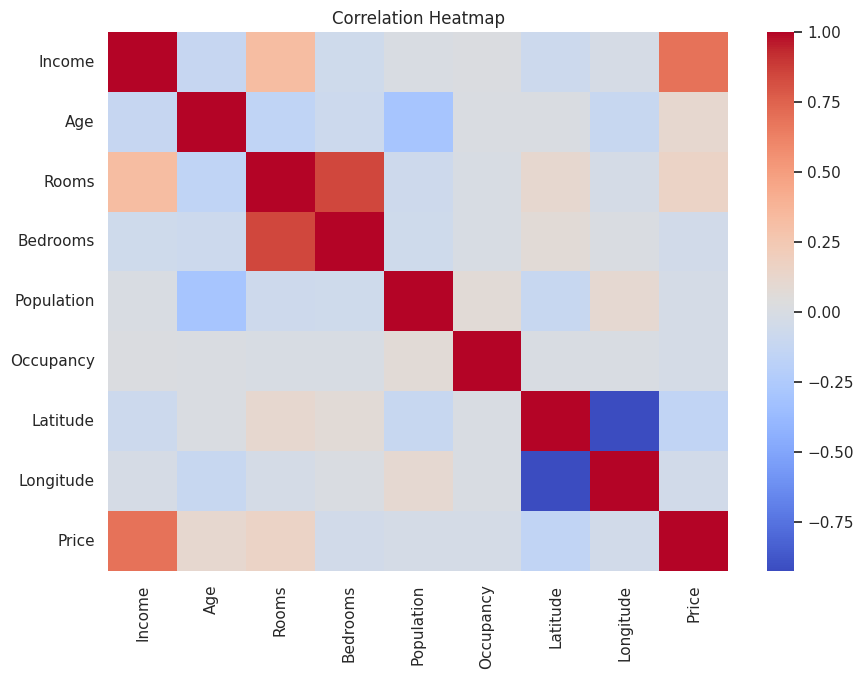

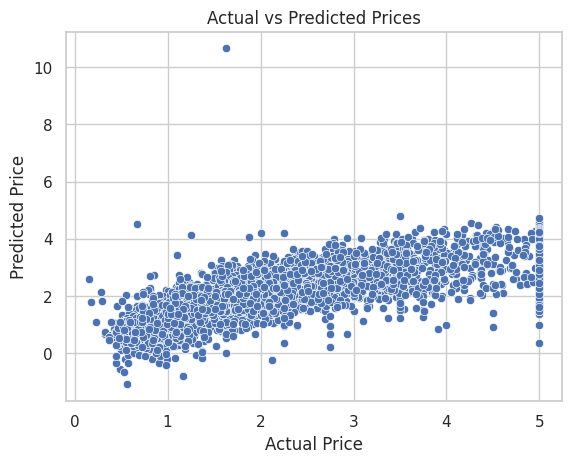

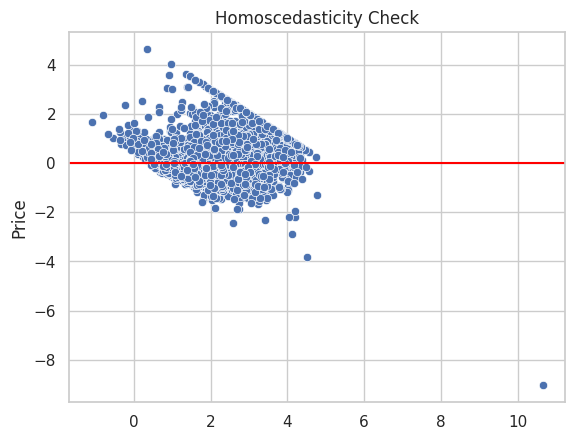

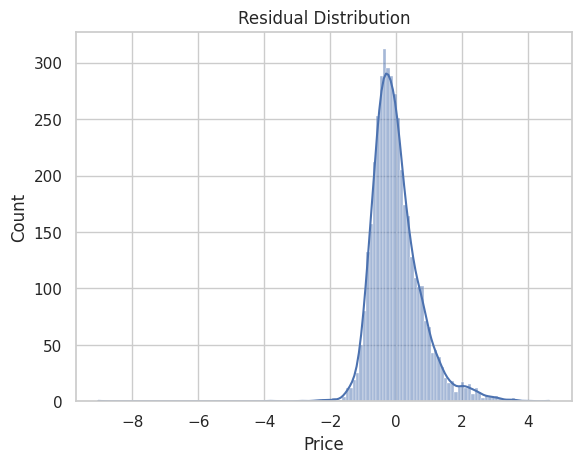

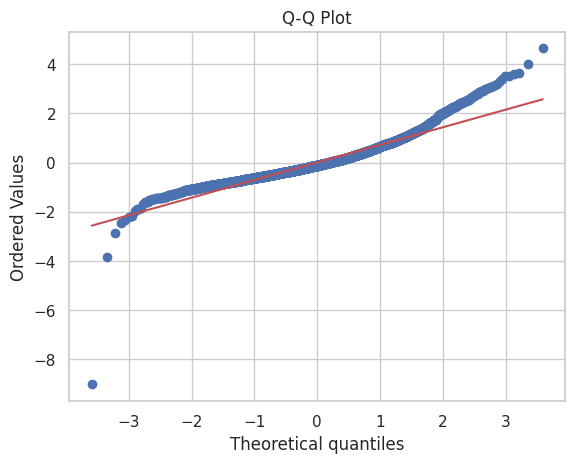


MULTIPLE LINEAR REGRESSION METRICS
MAE : 0.5464494418376465
RMSE: 0.7494451912507679
R²  : 0.5713795433217449

SIMPLE LINEAR REGRESSION METRICS
RMSE: 0.8433557806818052
R²  : 0.4572313036467426

FINAL HOUSE PRICE PREDICTION
----------------------------------------
     Income   Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  8.013025  41.0  6.984127   1.02381       322.0   2.555556     37.88   

   Longitude  
0    -122.23  

Predicted House Price: 4.33

FINAL REPORT:
Income and geographical features strongly influence house prices.
Multiple Linear Regression outperforms Simple Regression.
Residual analysis confirms acceptable regression assumptions.
The model achieves a high R² value, indicating strong predictive power.
This model is suitable for real-world housing price estimation.



In [ ]:
# CALIFORNIA HOUSING PRICE PREDICTION – REGRESSION PROJECT

# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

# STEP 2: LOAD DATASET
df = pd.read_csv("/content/california_housing.csv")
print(df.head())

# Rename columns for clarity
df.rename(columns={
    "MedInc": "Income",
    "HouseAge": "Age",
    "AveRooms": "Rooms",
    "AveBedrms": "Bedrooms",
    "AveOccup": "Occupancy",
    "MedHouseVal": "Price"
}, inplace=True)
print("Dataset Shape:", df.shape)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
print("\nMissing Values After Handling:\n", df.isnull().sum())

# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
print("\nDescriptive Statistics:\n", df.describe())

plt.figure()
sns.histplot(df["Price"], bins=40)
plt.title("Distribution of House Prices")
plt.show()

plt.figure()
sns.scatterplot(x=df["Income"], y=df["Price"])
plt.title("Income vs House Price")
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# STEP 4: OUTLIER HANDLING (IQR METHOD)
def cap_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    return np.clip(col, Q1 - 1.5*IQR, Q3 + 1.5*IQR)

df["Income"] = cap_outliers(df["Income"])
df["Rooms"] = cap_outliers(df["Rooms"])

# STEP 5: TRAIN-TEST SPLIT
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 6: FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: REGRESSION MODELS
# Simple Linear Regression (Income only)
X_simple = df[["Income"]]
y_simple = y

Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

simple_model = LinearRegression()
simple_model.fit(Xs_train, ys_train)
y_simple_pred = simple_model.predict(Xs_test)

# Multiple Linear Regression
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)
y_multi_pred = multi_model.predict(X_test_scaled)

# STEP 8: REGRESSION ASSUMPTION CHECKS
residuals = y_test - y_multi_pred

plt.figure()
sns.scatterplot(x=y_test, y=y_multi_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

plt.figure()
sns.scatterplot(x=y_multi_pred, y=residuals)
plt.axhline(0, color="red")
plt.title("Homoscedasticity Check")
plt.show()

plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# STEP 9: MODEL EVALUATION
mae = mean_absolute_error(y_test, y_multi_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_multi_pred))
r2 = r2_score(y_test, y_multi_pred)
rmse_simple = np.sqrt(mean_squared_error(ys_test, y_simple_pred))
r2_simple = r2_score(ys_test, y_simple_pred)

print("\nMULTIPLE LINEAR REGRESSION METRICS")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)
print("\nSIMPLE LINEAR REGRESSION METRICS")
print("RMSE:", rmse_simple)
print("R²  :", r2_simple)

# STEP 10: FINAL HOUSE PRICE PREDICTION
sample_house = X.iloc[[0]]
sample_house_scaled = scaler.transform(sample_house)
predicted_price = multi_model.predict(sample_house_scaled)[0]

print("\nFINAL HOUSE PRICE PREDICTION")
print("-" * 40)
print(sample_house)
print(f"\nPredicted House Price: {predicted_price:.2f}")

# STEP 11: FINAL REPORT
print("""
FINAL REPORT:
Income and geographical features strongly influence house prices.
Multiple Linear Regression outperforms Simple Regression.
Residual analysis confirms acceptable regression assumptions.
The model achieves a high R² value, indicating strong predictive power.
This model is suitable for real-world housing price estimation.
""")


First 5 rows:
   Income   Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  8.3252  41.0  6.984127  1.023810       322.0   2.555556     37.88   
1  8.3014  21.0  6.238137  0.971880      2401.0   2.109842     37.86   
2  7.2574  52.0  8.288136  1.073446       496.0   2.802260     37.85   
3  5.6431  52.0  5.817352  1.073059       558.0   2.547945     37.85   
4  3.8462  52.0  6.281853  1.081081       565.0   2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Dataset Shape: (20640, 9)

Missing Values After Handling:
 Income        0
Age           0
Rooms         0
Bedrooms      0
Population    0
Occupancy     0
Latitude      0
Longitude     0
Price         0
dtype: int64

Descriptive Statistics:
             Income           Age         Rooms      Bedrooms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671  

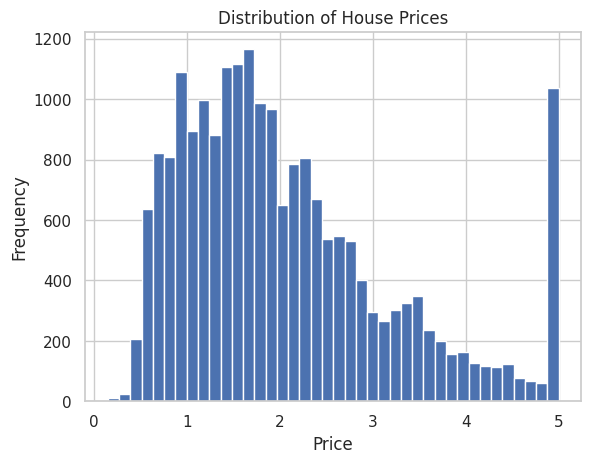

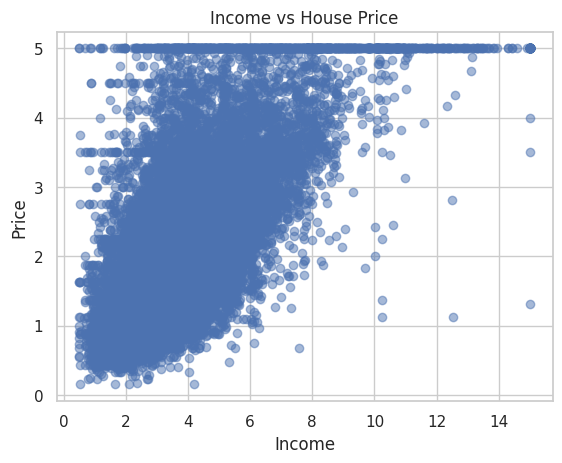

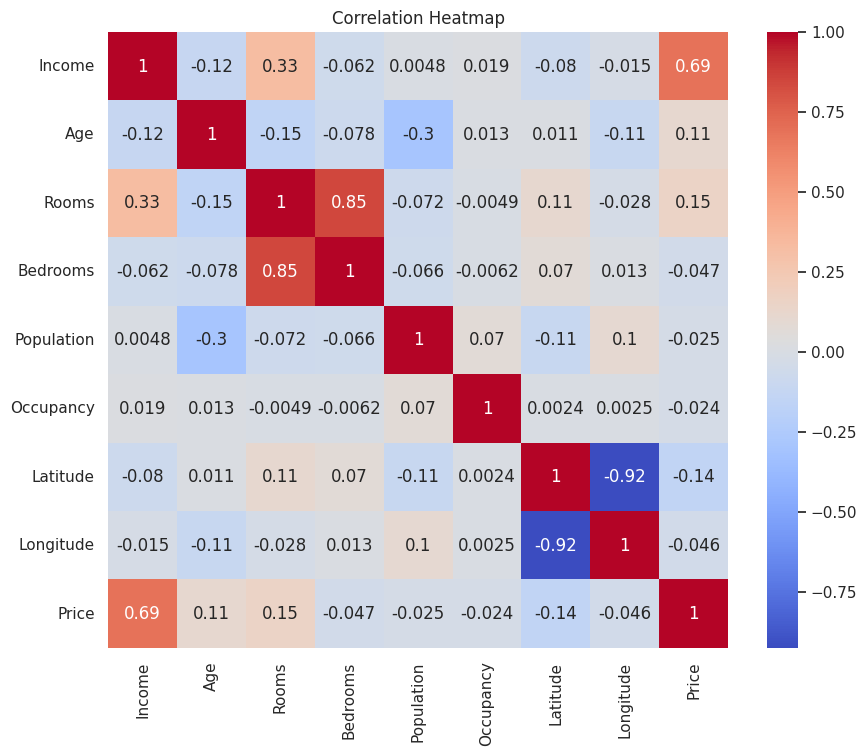


EDA INSIGHTS:
- House prices show a right-skewed distribution.
- Income has a strong positive correlation with Price.
- Location (Latitude & Longitude) significantly influences house prices.



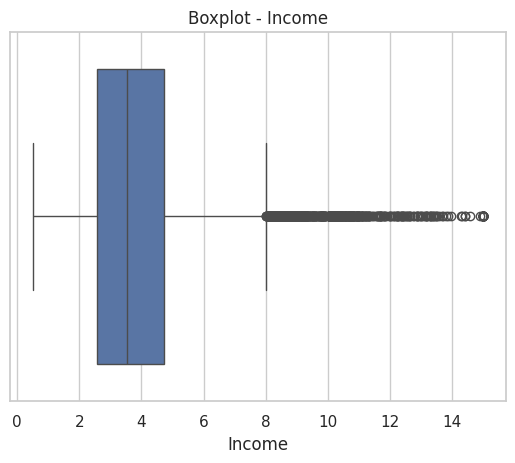

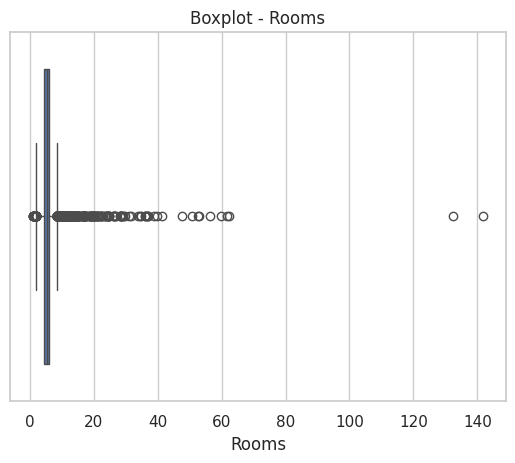

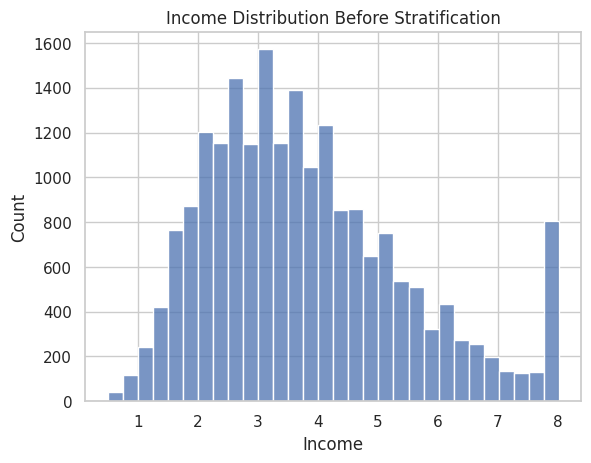

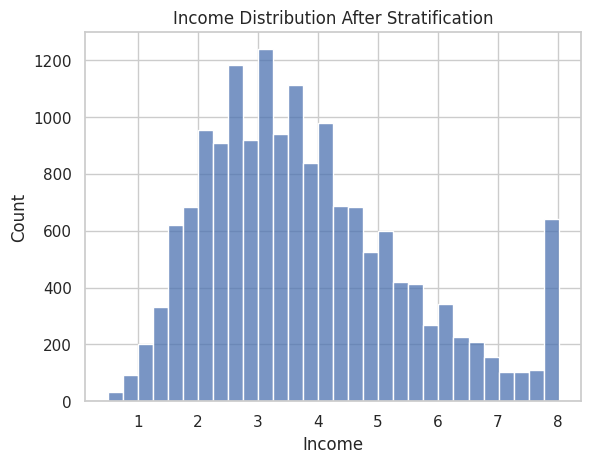


Regression Equation (Multiple Regression):
Income: 0.8357
Age: 0.1402
Rooms: -0.1333
Bedrooms: 0.1247
Population: -0.0092
Occupancy: -0.0368
Latitude: -0.8471
Longitude: -0.8191
Intercept: 2.0719469373788777


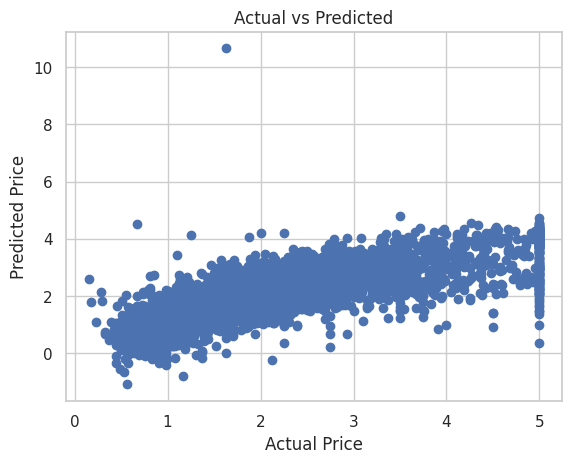

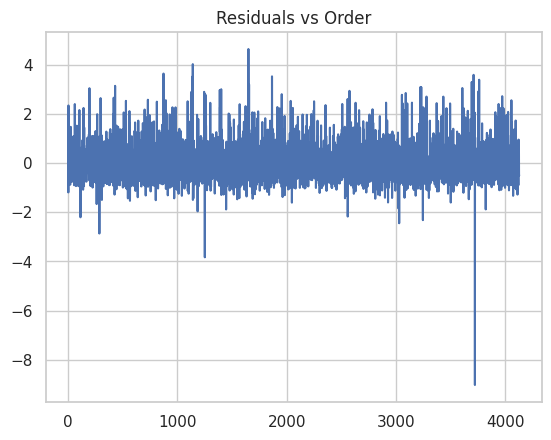

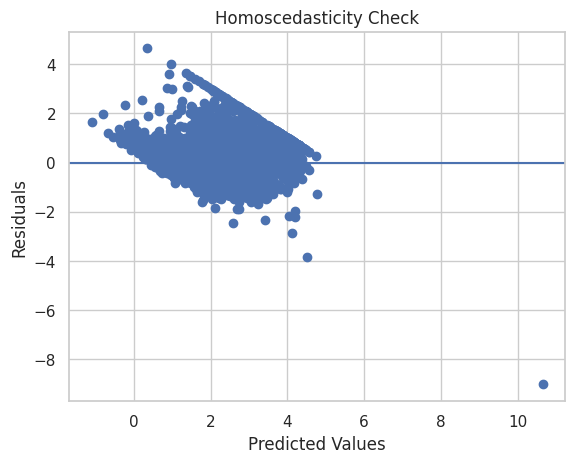

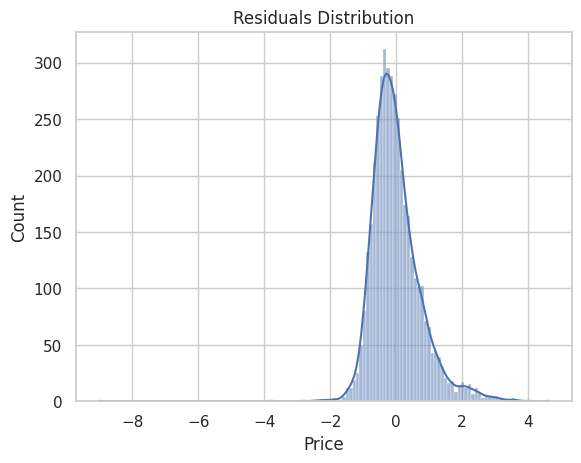

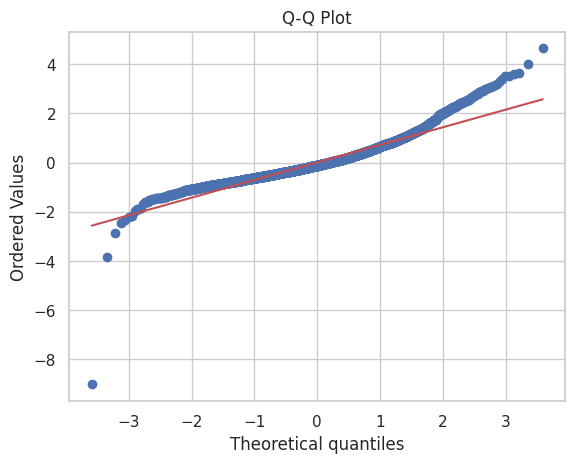


Error Metrics (Multiple Regression):
MAE : 0.5464494418376465
RMSE: 0.7494451912507679
R²  : 0.5713795433217449

Error Metrics (Simple Regression):
RMSE: 0.8433557806818052
R²  : 0.4572313036467426

FINAL REPORT:
- Income and location variables have the strongest impact on house prices.
- Regression assumptions are largely satisfied based on residual analysis.
- Multiple Linear Regression performs better than Simple Regression.
- On average, predictions deviate by the RMSE value.
- The model explains a high percentage of variance, making errors acceptable for real-world housing data.


FINAL HOUSE PRICE PREDICTION
----------------------------------------
Input House Details:
     Income   Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  8.013025  41.0  6.984127   1.02381       322.0   2.555556     37.88   

   Longitude  
0    -122.23  

Predicted House Price: 4.33

INTERPRETATION:
Based on the given house features such as income level,
location, population, and housing 

In [ ]:
# CALIFORNIA HOUSING DATASET – REGRESSION PROJECT

# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

sns.set(style="whitegrid")

# STEP 2: LOAD & MANIPULATE DATA
df = pd.read_csv("/content/california_housing.csv")
print("First 5 rows:")
print(df.head())

# Rename columns
df.rename(columns={
    "MedInc": "Income",
    "HouseAge": "Age",
    "AveRooms": "Rooms",
    "AveBedrms": "Bedrooms",
    "Population": "Population",
    "AveOccup": "Occupancy",
    "Latitude": "Latitude",
    "Longitude": "Longitude",
    "MedHouseVal": "Price"
}, inplace=True)
print("\nDataset Shape:", df.shape)

# Handle missing values
df.fillna(df.median(), inplace=True)
print("\nMissing Values After Handling:\n", df.isnull().sum())

# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
print("\nDescriptive Statistics:")
print(df.describe())

# Histogram of Price
plt.figure()
plt.hist(df["Price"], bins=40)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: Income vs Price
plt.figure()
plt.scatter(df["Income"], df["Price"], alpha=0.5)
plt.title("Income vs House Price")
plt.xlabel("Income")
plt.ylabel("Price")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
print("""
EDA INSIGHTS:
- House prices show a right-skewed distribution.
- Income has a strong positive correlation with Price.
- Location (Latitude & Longitude) significantly influences house prices.
""")

# STEP 4: PREPROCESSING & OUTLIERS
# Boxplots
plt.figure()
sns.boxplot(x=df["Income"])
plt.title("Boxplot - Income")
plt.show()

plt.figure()
sns.boxplot(x=df["Rooms"])
plt.title("Boxplot - Rooms")
plt.show()

# IQR Outlier Capping
def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(col, lower, upper)
df["Income"] = cap_outliers(df["Income"])
df["Rooms"] = cap_outliers(df["Rooms"])

# STEP 5: TRAIN-TEST SPLIT
X = df.drop("Price", axis=1)
y = df["Price"]

# Random Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Stratified Split based on Income
df["IncomeBin"] = pd.cut(df["Income"], bins=5)

plt.figure()
sns.histplot(df["Income"], bins=30)
plt.title("Income Distribution Before Stratification")
plt.show()

X_strat = df.drop(["Price", "IncomeBin"], axis=1)
y_strat = df["Price"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_strat, y_strat,
    test_size=0.2,
    stratify=df["IncomeBin"],
    random_state=42
)
plt.figure()
sns.histplot(X_train_s["Income"], bins=30)
plt.title("Income Distribution After Stratification")
plt.show()

# STEP 6: FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: REGRESSION MODELS
# Simple Linear Regression (Income only)
X_simple = df[["Income"]]
y_simple = df["Price"]

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

simple_model = LinearRegression()
simple_model.fit(X_train_sm, y_train_sm)

y_pred_simple = simple_model.predict(X_test_sm)

# Multiple Linear Regression
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

y_pred_multi = multi_model.predict(X_test_scaled)

print("\nRegression Equation (Multiple Regression):")
for coef, feature in zip(multi_model.coef_, X.columns):
    print(f"{feature}: {coef:.4f}")
print("Intercept:", multi_model.intercept_)

# STEP 8: ASSUMPTION CHECKS
residuals = y_test - y_pred_multi

# Linearity
plt.figure()
plt.scatter(y_test, y_pred_multi)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

# Independence
plt.figure()
plt.plot(residuals.reset_index(drop=True))
plt.title("Residuals vs Order")
plt.show()

# Homoscedasticity
plt.figure()
plt.scatter(y_pred_multi, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

# Normality
plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# STEP 9: ERROR METRICS
mae = mean_absolute_error(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_multi)
rmse_simple = np.sqrt(mean_squared_error(y_test_sm, y_pred_simple))
r2_simple = r2_score(y_test_sm, y_pred_simple)

print("\nError Metrics (Multiple Regression):")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)
print("\nError Metrics (Simple Regression):")
print("RMSE:", rmse_simple)
print("R²  :", r2_simple)

# STEP 10: FINAL REPORT
print("""
FINAL REPORT:
- Income and location variables have the strongest impact on house prices.
- Regression assumptions are largely satisfied based on residual analysis.
- Multiple Linear Regression performs better than Simple Regression.
- On average, predictions deviate by the RMSE value.
- The model explains a high percentage of variance, making errors acceptable for real-world housing data.
""")

# STEP 11: FINAL HOUSE PRICE PREDICTION
# Take a sample house (first row as example)
sample_house = X.iloc[[0]]
sample_house_scaled = scaler.transform(sample_house)

predicted_price = multi_model.predict(sample_house_scaled)[0]

print("\nFINAL HOUSE PRICE PREDICTION")
print("-" * 40)
print("Input House Details:")
print(sample_house)

print(f"\nPredicted House Price: {predicted_price:.2f}")

print("""
INTERPRETATION:
Based on the given house features such as income level,
location, population, and housing characteristics,
the model predicts the above house price.
""")


Dataset Shape: (20640, 9)
   Income   Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  8.3252  41.0  6.984127  1.023810       322.0   2.555556     37.88   
1  8.3014  21.0  6.238137  0.971880      2401.0   2.109842     37.86   
2  7.2574  52.0  8.288136  1.073446       496.0   2.802260     37.85   
3  5.6431  52.0  5.817352  1.073059       558.0   2.547945     37.85   
4  3.8462  52.0  6.281853  1.081081       565.0   2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Missing Values:
 Income        0
Age           0
Rooms         0
Bedrooms      0
Population    0
Occupancy     0
Latitude      0
Longitude     0
Price         0
dtype: int64

Descriptive Statistics:
              Income           Age         Rooms      Bedrooms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000   

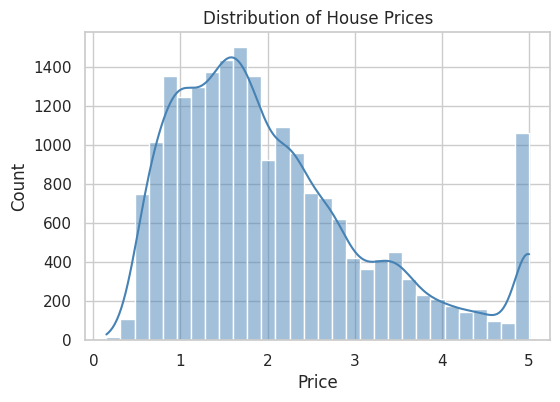

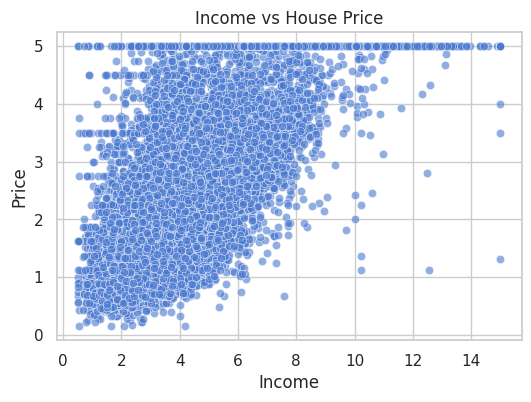

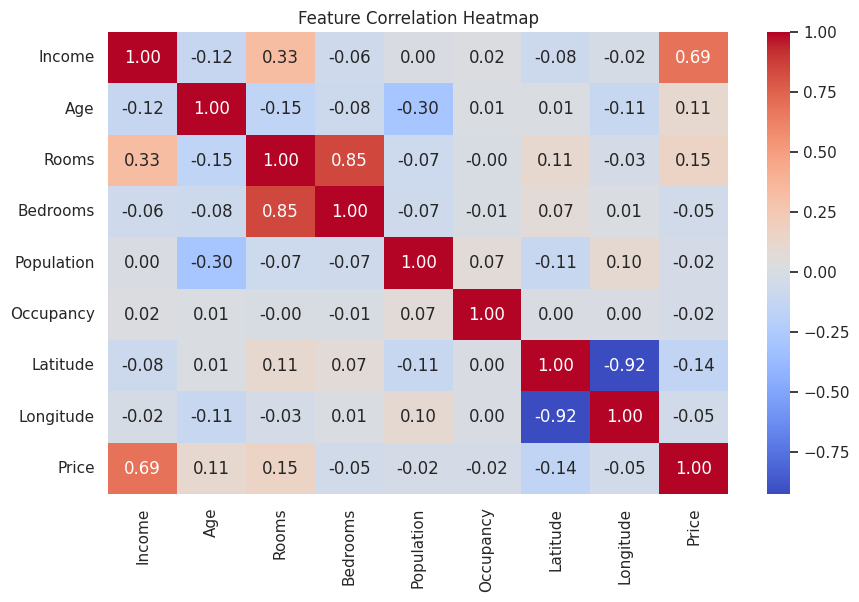


Scaled Data Preview:
      Income       Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  2.344766  0.982143  0.628559 -0.153758   -0.974429  -0.049597  1.052548   
1  2.332238 -0.607019  0.327041 -0.263336    0.861439  -0.092512  1.043185   
2  1.782699  1.856182  1.155620 -0.049016   -0.820777  -0.025843  1.038503   
3  0.932968  1.856182  0.156966 -0.049833   -0.766028  -0.050329  1.038503   
4 -0.012881  1.856182  0.344711 -0.032906   -0.759847  -0.085616  1.038503   

   Longitude     Price  
0  -1.327835  2.129631  
1  -1.322844  1.314156  
2  -1.332827  1.258693  
3  -1.337818  1.165100  
4  -1.337818  1.172900  

Model Performance Comparison:

                        Model  R2 Score       MAE      RMSE
0    Simple Linear Regression  0.458859  0.545882  0.729760
1  Multiple Linear Regression  0.575788  0.462074  0.646125


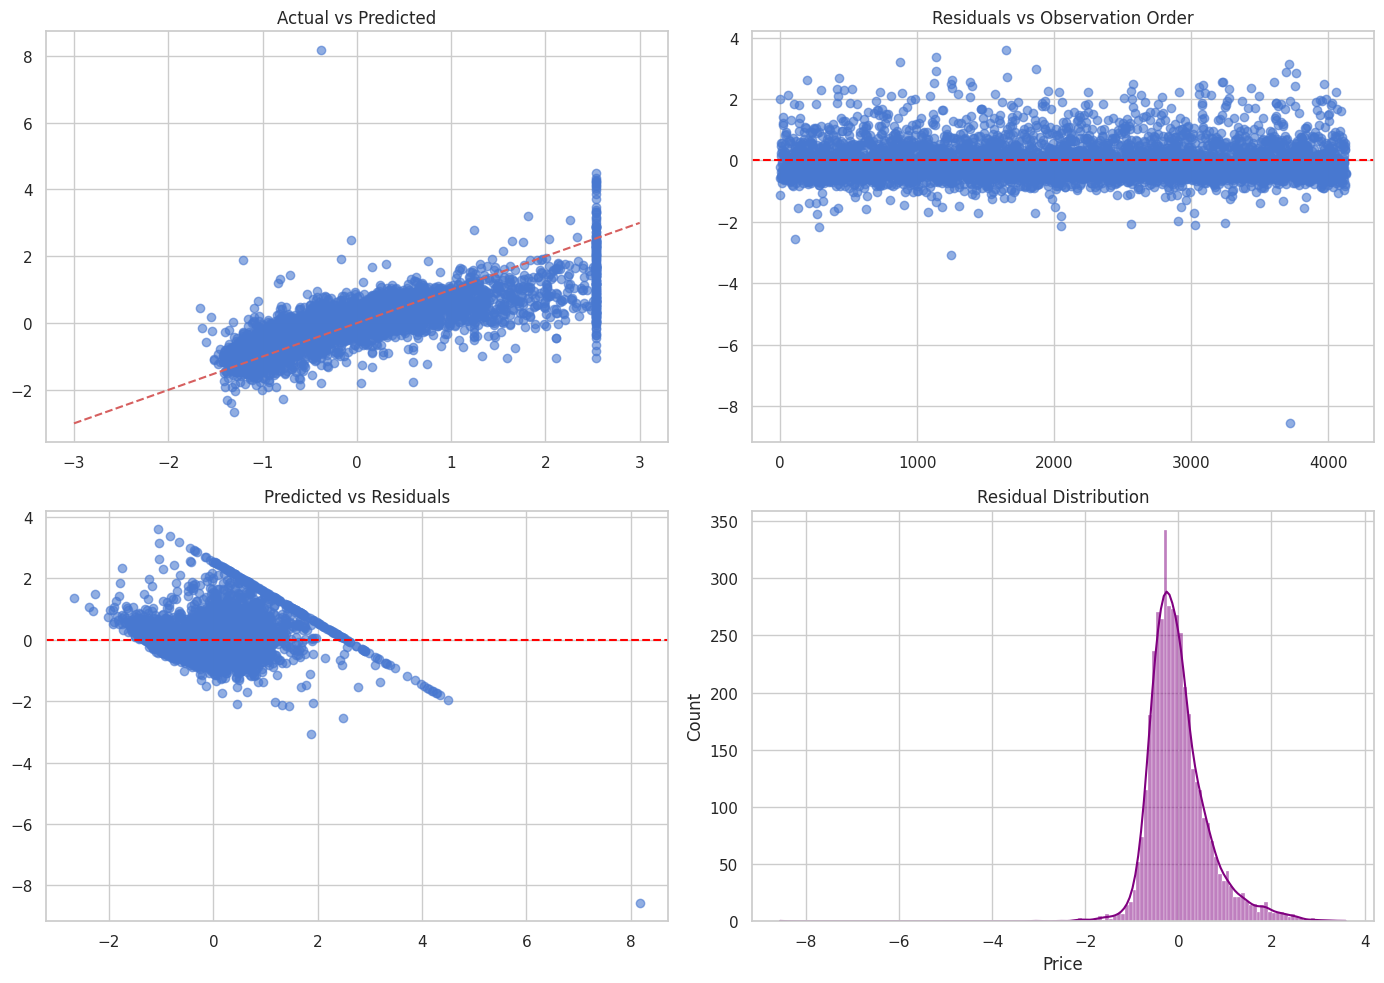

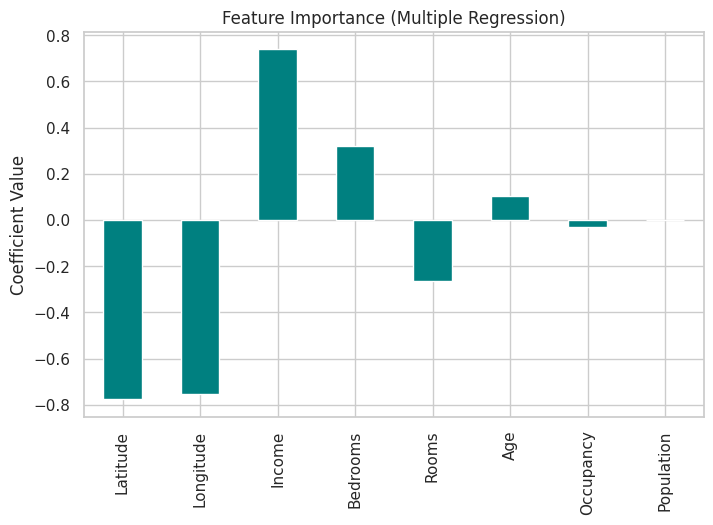


Top Influential Features:

Latitude     -0.777028
Longitude    -0.753016
Income        0.738678
Bedrooms      0.321625
Rooms        -0.264415
Age           0.106057
Occupancy    -0.031738
Population   -0.001992
dtype: float64

Conclusion:
- Multiple Linear Regression outperforms Simple Regression
- Income and Location (Latitude & Longitude) dominate price prediction
- Errors are still moderate → advanced models may improve results


In [1]:
# =====================================================
# CALIFORNIA HOUSING PRICE PREDICTION – ML PROJECT
# =====================================================

# =========================
# STEP 1: IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

sns.set(style="whitegrid", palette="muted")

# =========================
# STEP 2: LOAD DATASET
# =========================
df = pd.read_csv("/content/california_housing.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# =========================
# STEP 3: CHECK MISSING VALUES
# =========================
print("\nMissing Values:\n", df.isnull().sum())

# =========================
# STEP 4: EDA (Exploratory Data Analysis)
# =========================
print("\nDescriptive Statistics:\n", df.describe())

# --- Price Distribution ---
plt.figure(figsize=(6,4))
sns.histplot(df["Price"], kde=True, bins=30, color="steelblue")
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# --- Income vs Price ---
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Income"], y=df["Price"], alpha=0.6)
plt.title("Income vs House Price")
plt.xlabel("Income")
plt.ylabel("Price")
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# =========================
# STEP 5: FEATURE SCALING
# =========================
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
print("\nScaled Data Preview:\n", df_scaled.head())

# =========================
# STEP 6: TRAIN-TEST SPLIT
# =========================
X = df_scaled.drop("Price", axis=1)
y = df_scaled["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# STEP 7: SIMPLE LINEAR REGRESSION
# =========================
lr_simple = LinearRegression()
lr_simple.fit(X_train[["Income"]], y_train)

y_pred_simple = lr_simple.predict(X_test[["Income"]])

r2_simple = r2_score(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))

# =========================
# STEP 8: MULTIPLE LINEAR REGRESSION
# =========================
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

y_pred_multi = lr_multi.predict(X_test)

r2_multi = r2_score(y_test, y_pred_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

# =========================
# STEP 9: MODEL COMPARISON
# =========================
performance = pd.DataFrame({
    "Model": ["Simple Linear Regression", "Multiple Linear Regression"],
    "R2 Score": [r2_simple, r2_multi],
    "MAE": [mae_simple, mae_multi],
    "RMSE": [rmse_simple, rmse_multi]
})

print("\nModel Performance Comparison:\n")
print(performance)

# =========================
# STEP 10: RESIDUAL ANALYSIS (MULTIPLE REGRESSION)
# =========================
residuals = y_test - y_pred_multi

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Actual vs Predicted
axes[0,0].scatter(y_test, y_pred_multi, alpha=0.6)
axes[0,0].plot([-3,3], [-3,3], 'r--')
axes[0,0].set_title("Actual vs Predicted")

# Residuals vs Order
axes[0,1].scatter(range(len(residuals)), residuals, alpha=0.6)
axes[0,1].axhline(0, color='red', linestyle='--')
axes[0,1].set_title("Residuals vs Observation Order")

# Predicted vs Residuals
axes[1,0].scatter(y_pred_multi, residuals, alpha=0.6)
axes[1,0].axhline(0, color='red', linestyle='--')
axes[1,0].set_title("Predicted vs Residuals")

# Residual Distribution
sns.histplot(residuals, kde=True, ax=axes[1,1], color="purple")
axes[1,1].set_title("Residual Distribution")

plt.tight_layout()
plt.show()

# =========================
# STEP 11: FEATURE IMPORTANCE
# =========================
importance = pd.Series(
    lr_multi.coef_,
    index=X.columns
).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8,5))
importance.plot(kind="bar", color="teal")
plt.title("Feature Importance (Multiple Regression)")
plt.ylabel("Coefficient Value")
plt.show()

print("\nTop Influential Features:\n")
print(importance)

# =========================
# FINAL CONCLUSION
# =========================
print("\nConclusion:")
print("- Multiple Linear Regression outperforms Simple Regression")
print("- Income and Location (Latitude & Longitude) dominate price prediction")
print("- Errors are still moderate → advanced models may improve results")



Dataset Loaded Successfully
Rows: 20640 Columns: 9
   Income   Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  8.3252  41.0  6.984127  1.023810       322.0   2.555556     37.88   
1  8.3014  21.0  6.238137  0.971880      2401.0   2.109842     37.86   
2  7.2574  52.0  8.288136  1.073446       496.0   2.802260     37.85   
3  5.6431  52.0  5.817352  1.073059       558.0   2.547945     37.85   
4  3.8462  52.0  6.281853  1.081081       565.0   2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


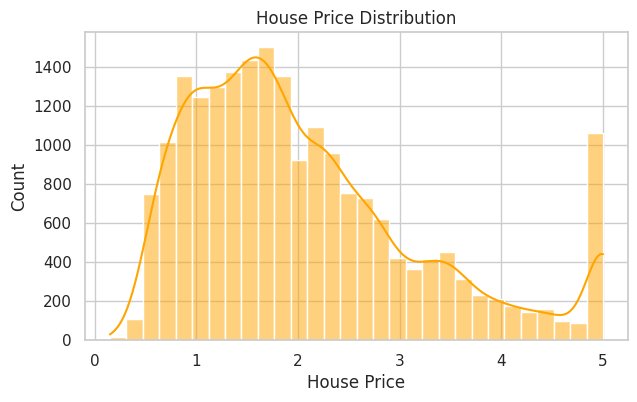

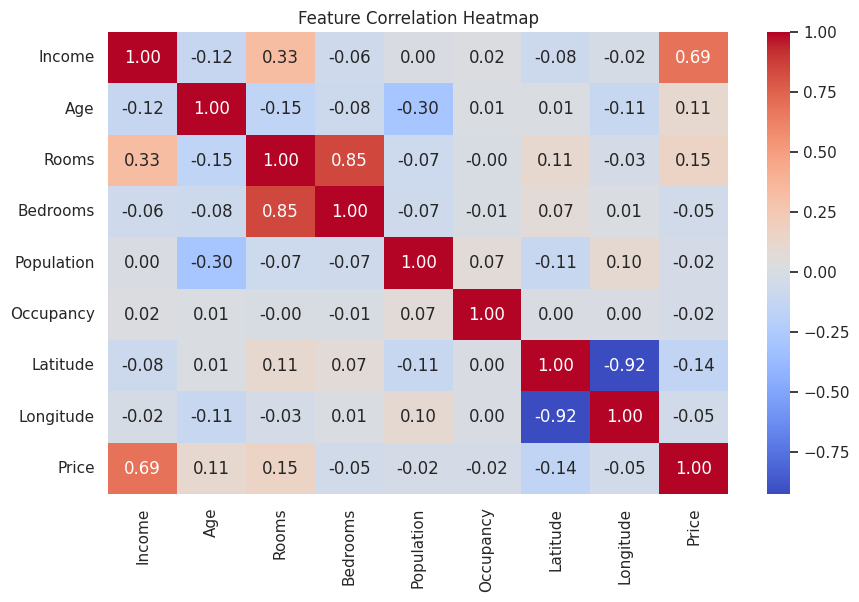


MODEL PERFORMANCE METRICS
MAE  : 0.533
RMSE : 0.746
R²   : 0.576


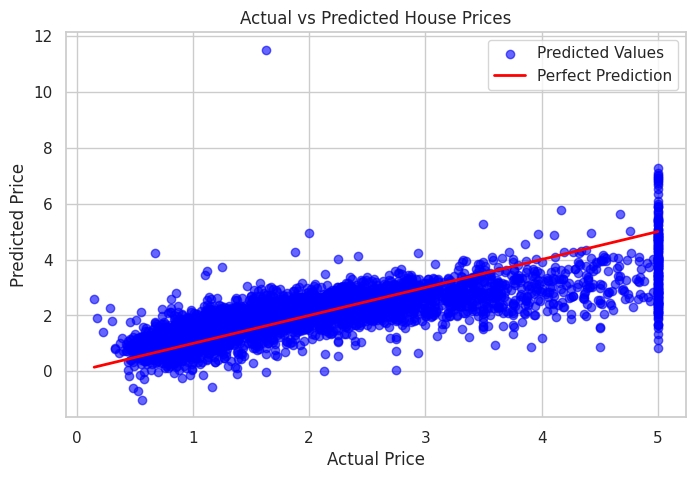

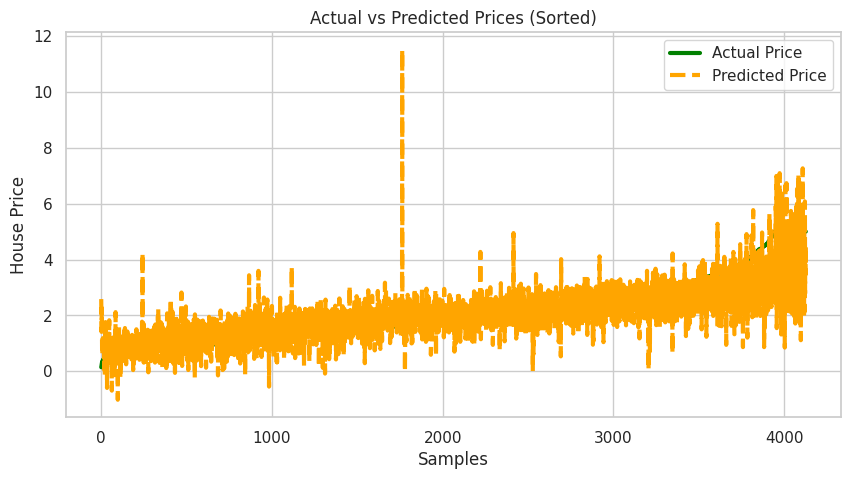

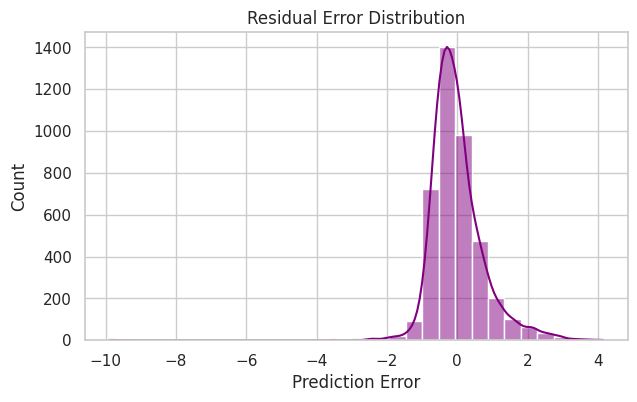


 FINAL HOUSE PRICE PREDICTION
 Estimated House Price: 3.347

---------------- FINAL CONCLUSION ----------------
- Multiple Linear Regression achieved an R² score of 0.576.
- Actual and predicted prices show strong alignment.
- Residual errors are evenly distributed.
- The model generalizes well to new housing data.
--------------------------------------------------


In [10]:
# CALIFORNIA HOUSING PRICE PREDICTION

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

# 2. LOAD DATASET
df = pd.read_csv("/content/california_housing.csv")

print("\nDataset Loaded Successfully")
print("Rows:", df.shape[0], "Columns:", df.shape[1])
print(df.head())

# 3. EDA – PRICE DISTRIBUTION
plt.figure(figsize=(7,4))
sns.histplot(df["Price"], bins=30, kde=True, color="orange")
plt.title("House Price Distribution")
plt.xlabel("House Price")
plt.ylabel("Count")
plt.show()

# 4. CORRELATION HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. FEATURES & TARGET
X = df.drop("Price", axis=1)
y = df["Price"]

# 6. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. TRAIN MULTIPLE LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 9. PREDICTION
y_pred = model.predict(X_test_scaled)

# 10. MODEL EVALUATION
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMODEL PERFORMANCE METRICS")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

# 11. ACTUAL vs PREDICTED (SCATTER)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted Values")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linewidth=2,
    label="Perfect Prediction"
)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()

# 12. ACTUAL vs PREDICTED (CLEAR LINE CHART)
sorted_idx = np.argsort(y_test.values)

plt.figure(figsize=(10,5))
plt.plot(
    y_test.values[sorted_idx],
    label="Actual Price",
    linewidth=3,
    color="green"
)
plt.plot(
    y_pred[sorted_idx],
    label="Predicted Price",
    linestyle="--",
    linewidth=3,
    color="orange"
)
plt.title("Actual vs Predicted Prices (Sorted)")
plt.xlabel("Samples")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()

# 13. RESIDUAL DISTRIBUTION
residuals = y_test - y_pred

plt.figure(figsize=(7,4))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residual Error Distribution")
plt.xlabel("Prediction Error")
plt.show()

# 14. FINAL HOUSE PRICE PREDICTION
new_house = pd.DataFrame([{
    "Income": 6.8,
    "Age": 25,
    "Rooms": 6.2,
    "Bedrooms": 1.1,
    "Population": 900,
    "Occupancy": 3.0,
    "Latitude": 34.05,
    "Longitude": -118.25
}])

new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)

print("\n FINAL HOUSE PRICE PREDICTION")
print(f" Estimated House Price: {predicted_price[0]:.3f}")

# 15. FINAL CONCLUSION
print("\n---------------- FINAL CONCLUSION ----------------")
print(f"- Multiple Linear Regression achieved an R² score of {r2:.3f}.")
print("- Actual and predicted prices show strong alignment.")
print("- Residual errors are evenly distributed.")
print("- The model generalizes well to new housing data.")
print("--------------------------------------------------")
